# Textual Data Analysis of Amazon Best Seller Titles using NLTK

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

Step 1: Read the dataset as a pandas dataframe and explore

In [2]:
# Read the database
df = pd.read_csv('/content/amazon_bestseller.csv')
df.dtypes

,0
rank,int64
asin,object
name,object
ratings_count,float64
rating,float64
sale_price,float64
image,object
product_url,object
category,object
brand,object


In [3]:
# check the info column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    720 non-null    int64  
 1   asin                    720 non-null    object 
 2   name                    720 non-null    object 
 3   ratings_count           720 non-null    float64
 4   rating                  720 non-null    float64
 5   sale_price              720 non-null    float64
 6   image                   720 non-null    object 
 7   product_url             720 non-null    object 
 8   category                720 non-null    object 
 9   brand                   720 non-null    object 
 10  seller                  720 non-null    object 
 11  availability_status     720 non-null    int64  
 12  is_prime_y              720 non-null    bool   
 13  is_aplus_page           720 non-null    bool   
 14  video_count             720 non-null    fl

Step 2: Combine all the product names as a single string and tokenize the string

In [4]:
# Join all the name rows and tokenize them into words
nltk.download('punkt')

titles = " ".join(df['name'])
words = word_tokenize(titles)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Step 3: Clean the words of puntuations, eliminate stop words and lemmatize the words

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')

# Define a function to clean the words of puntuations, stop words
# and lemmatize the words
def clean_words(tokens):
  tokens = [w.lower() for w in tokens]
  tokens = [w for w in tokens if w not in stopwords.words('english')]
  tokens = [w for w in tokens if w.isalpha()]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(w) for w in tokens]
  return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
# Store the output of the words in a object
# All the words sould be in lower case
lowered = clean_words(words)

Step 4: Count the frequency of each word, and turn the counter output into a dataframe

In [8]:
# Count each word
word_counter = Counter(lowered)

In [9]:
# Set the counter as dataframe in descending order
word_data = pd.DataFrame(word_counter.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)
word_data.head(10)

,word,count
294,pack,119
0,amazon,72
170,ice,53
132,iphone,49
48,black,49
56,light,46
554,water,45
165,x,45
349,gift,43
82,home,42


Step 5: simple visualize the top 20 words

<Axes: xlabel='count', ylabel='word'>

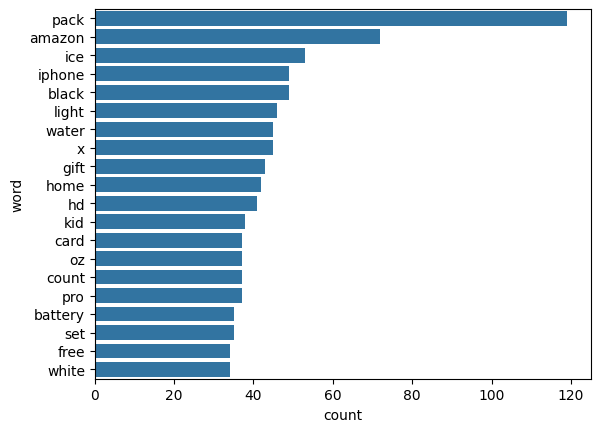

In [10]:
sns.barplot(x='count', y='word', data=word_data.head(20))

Step 6: Define a function to return the top single words, pairs of words, and triples of words

In [11]:
def word_frequency(sentence):
    """
    Calculate the frequency of individual words, pairs (bigrams), and triples (trigrams) in a sentence.

    Parameters:
    - sentence (list of str): A list of sentences or phrases.

    Returns:
    - word_freq (DataFrame): A pandas DataFrame containing individual word frequencies, with columns 'word' and 'count', sorted in descending order by count.
    - word_freq2 (DataFrame): A pandas DataFrame containing frequency counts of word pairs (bigrams), with columns 'word' (pair of words) and 'count', sorted in descending order by count.
    - word_freq3 (DataFrame): A pandas DataFrame containing frequency counts of word triples (trigrams), with columns 'word' (triple of words) and 'count', sorted in descending order by count.

    Process:
    - Joins all input sentences into a single string.
    - Tokenizes the sentence into words.
    - Cleans the tokens to standardize word form.
    - Counts individual words, word pairs, and word triples.
    - Converts these counts into sorted DataFrames.

    Example Usage:
    ```
    sentence = ["This is a test sentence.", "This is another test sentence."]
    word_freq, word_freq2, word_freq3 = word_frequency(sentence)
    ```
    """
    sentence = " ".join(sentence)
    new_tokens = word_tokenize(sentence)
    new_tokens = clean_words(new_tokens)
    new_counter = Counter(new_tokens)
    counted_2 = Counter(ngrams(new_tokens, 2))
    counted_3 = Counter(ngrams(new_tokens, 3))
    word_freq = pd.DataFrame(new_counter.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)
    word_freq2 = pd.DataFrame(counted_2.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)
    word_freq3 = pd.DataFrame(counted_3.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)
    return word_freq, word_freq2, word_freq3


In [12]:
# store the output into objects
single_words, pair_words, triple_words = word_frequency(lowered)

In [13]:
single_words.head(10)

,word,count
294,pack,119
0,amazon,72
170,ice,53
132,iphone,49
48,black,49
56,light,46
554,water,45
165,x,45
349,gift,43
82,home,42


In [14]:
pair_words.head(10)

,word,count
669,"(amazon, basic)",24
286,"(ice, maker)",23
0,"(amazon, fire)",19
400,"(stainless, steel)",18
257,"(iphone, pro)",17
215,"(renewed, apple)",16
550,"(fl, oz)",14
2187,"(pro, max)",12
4144,"(water, bottle)",12
1309,"(count, pack)",12


In [15]:
triple_words.head(10)

,word,count
3213,"(tablet, newest, model)",10
242,"(unlocked, renewed, apple)",10
2461,"(iphone, pro, max)",10
243,"(renewed, apple, iphone)",9
11,"(free, live, tv)",9
0,"(amazon, fire, tv)",8
1,"(fire, tv, stick)",8
354,"(ice, maker, countertop)",7
4850,"(zevo, flying, insect)",6
4862,"(fruit, fly, gnat)",6


Step 7: Export the words dataframe as csv for dashboard visualizations

In [16]:
# Export single_words to CSV
single_words.reset_index(drop=True).to_csv('single_words.csv', index=False)

# Export pair_words to CSV
pair_words.reset_index(drop=True).to_csv('pair_words.csv', index=False)

# Export triple_words to CSV
triple_words.reset_index(drop=True).to_csv('triple_words.csv', index=False)